In [1]:
%load_ext autoreload
%autoreload 2

import sys; sys.path.append('../')
import numpy as np
from scipy.spatial import Voronoi, voronoi_plot_2d
import matplotlib.pyplot as plt
from src.utils.graphs import get_keypoints, relative_neighborhood, random_graph
from src.utils.visualize import plot_voronoi
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import numpy as np
import cv2 as cv
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 120

In [2]:
points = np.array([[0, 0], [0, 1], [0, 2], [1, 0], [1, 1], [1, 2],
                   [2, 0], [2, 1], [2, 2]])

In [3]:
vor = Voronoi(points)

In [4]:
vor

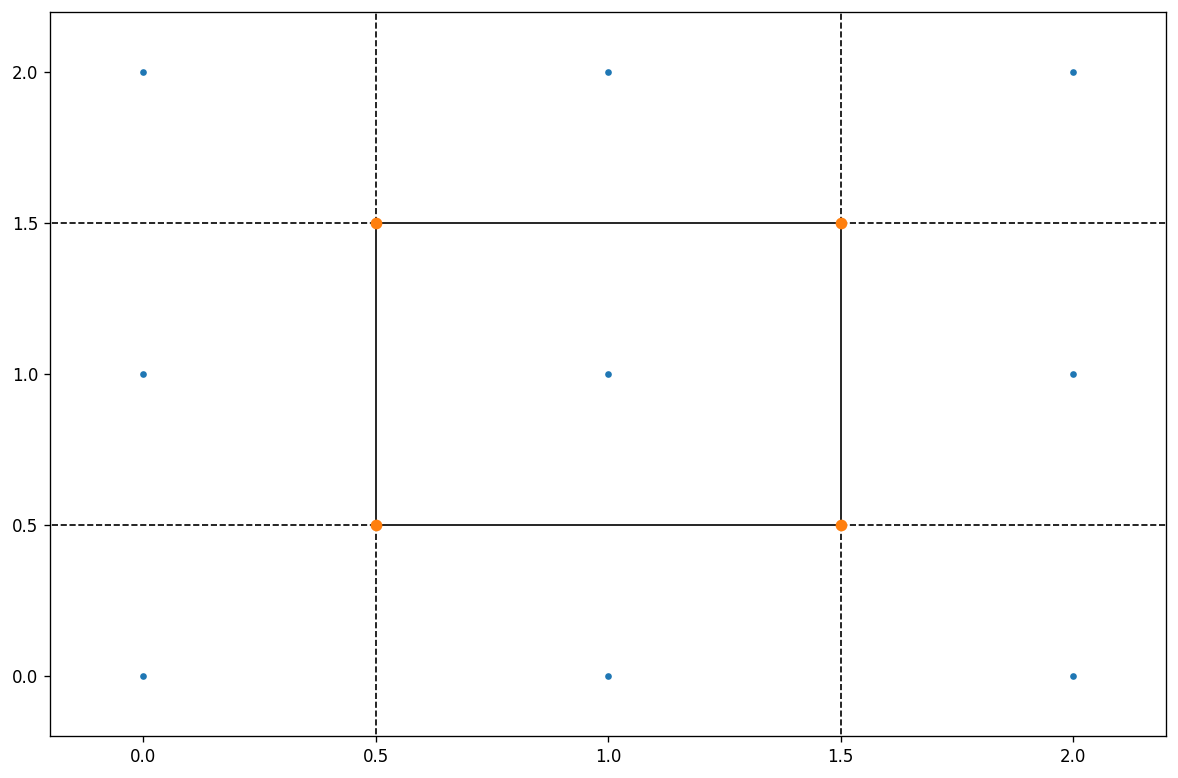

In [5]:
fig = voronoi_plot_2d(vor)
plt.show()

In [2]:
N_FEATURES_LIMIT = None 
test_img_path = r"../test_images/test_img_3.jpg"
train_set = r"../data/Ki67/SHIDC-B-Ki-67/Train"

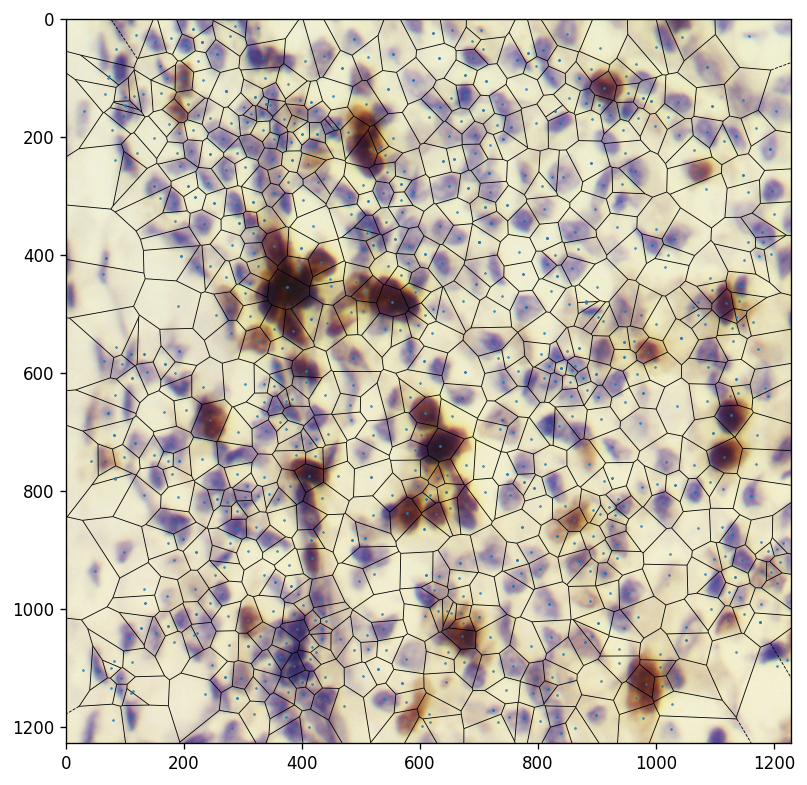

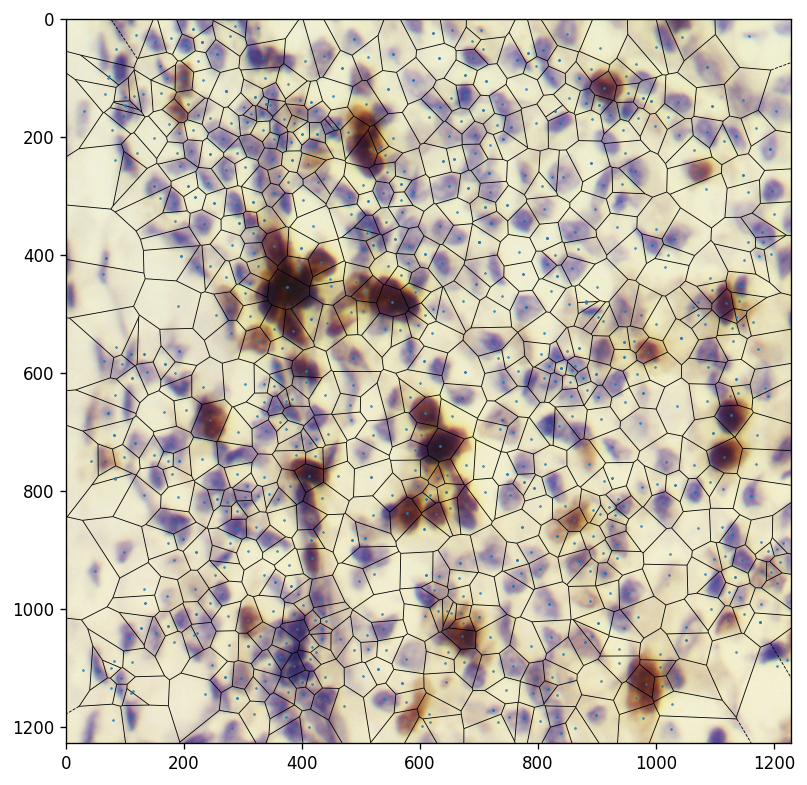

In [6]:
img_arr = plt.imread(test_img_path)
keys = get_keypoints(img_arr,N_FEATURES_LIMIT)
vor = Voronoi(keys)
plot_voronoi(vor,img_arr,show_points=True,show_verticles=False,line_width=0.5)

p10_0031_5.jpg
300


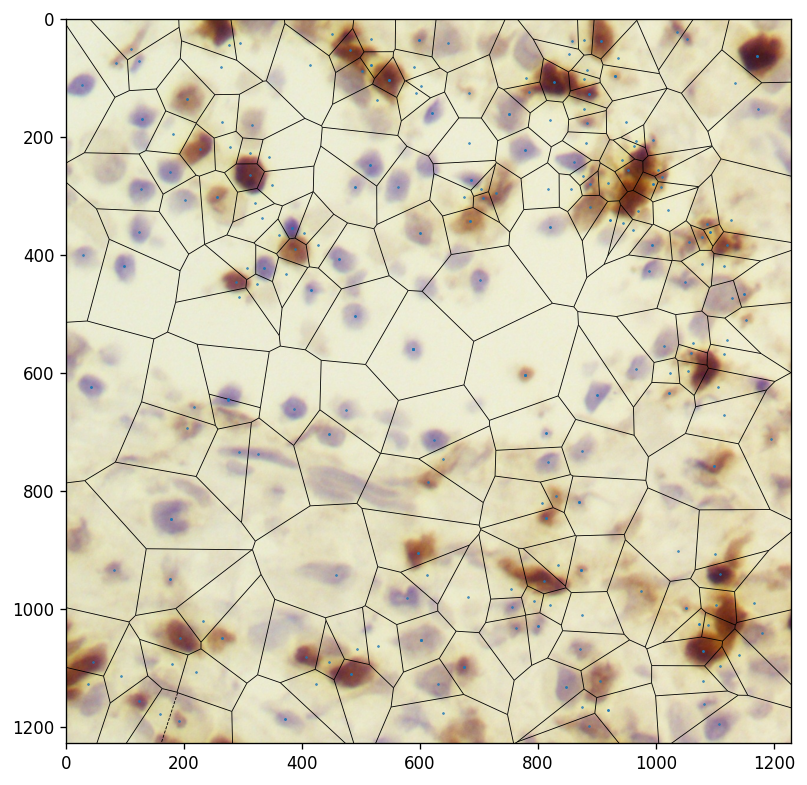

p10_0033_6.jpg
301


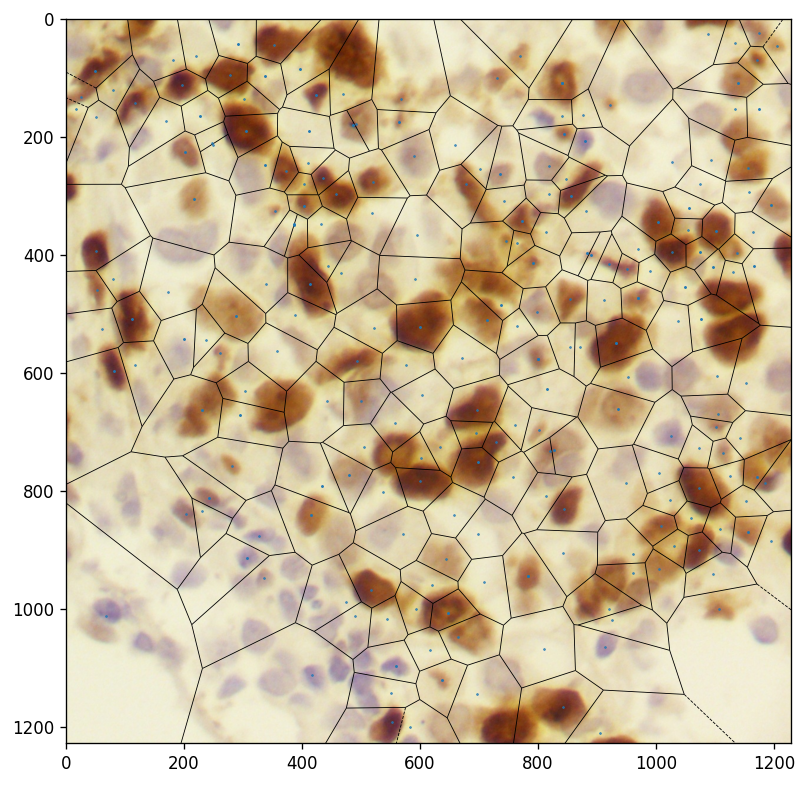

break


In [7]:
num_files = 2
it = 0
for root, dirs, files in os.walk(train_set):
    for file in files:
        #print(file)
        if it >= num_files:
            print('break')
            break
       # print(file.split('.'))
        if file.split('.')[1] == 'jpg':
            print(file)
            it+=1
            filepath=os.path.join(root,file)
            img_arr = plt.imread(filepath)
            #print(img_arr)
            sift = cv.SIFT_create(nfeatures=300, contrastThreshold=0.0002,edgeThreshold=100,sigma=1.6)
            keys = get_keypoints(img_arr,N_FEATURES_LIMIT,detector=sift)
            print(len(keys))
            vor = Voronoi(keys)
            plot_voronoi(vor,img_arr,show_points=True,show_verticles=False,line_width=0.5,save_as_file=False,filename="voronoi_"+file)
            plt.show()

In [8]:
os.getcwd()

'C:\\Users\\Wilk\\local-features-segmentation\\notebooks'

In [10]:

gray= cv.cvtColor(img_arr,None)
sift = cv.SIFT_create()
kp = sift.detect(gray,None)
img=cv.drawKeypoints(gray,kp,img_arr,flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

p10_0031_5.jpg
p10_0031_5.jpg


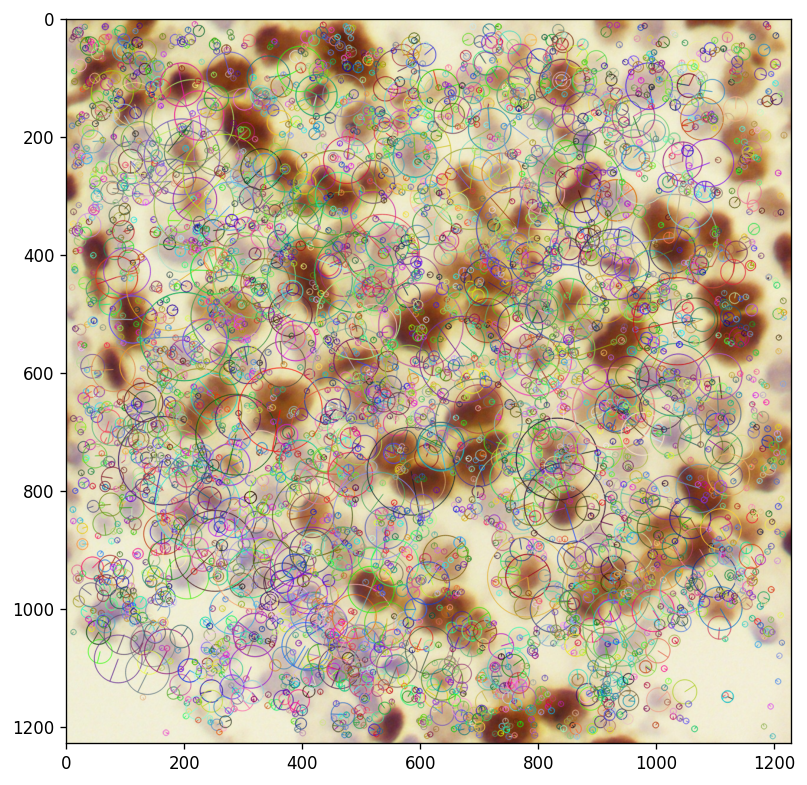

In [22]:
num_files = 5
it = 0
for root, dirs, files in os.walk(train_set):
    for file in files:
        #print(file)
        print(file)
        if it > num_files:
            print('break')
            break
       # print(file.split('.'))
        if file.split('.')[1] == 'jpg':
            print(file)
            it+=1
            filepath=os.path.join(root,file)
            img = cv.imread(filepath)
            img_arr = plt.imread(filepath)
            #print(img_arr)
            sift = cv.SIFT_create(
                nOctaveLayers=40,
                contrastThreshold=0.01,
                edgeThreshold=30,
                sigma=1.3)
            kp = sift.detect(gray,None)
            kp = [key for key in kp if (key.size >= 8 and key.size<=150)]
            img=cv.drawKeypoints(gray,kp,img,flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
            plt.imshow(img)
            plt.savefig(file+"_keypoints.jpg")
            plt.show()
            break